In [3]:
import nltk

In [4]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import style
style.use('ggplot')
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [6]:
df=pd.read_csv('/content/IMDB dataset.csv.csv')

In [8]:
df.head()

,text,label
0,I always wrote this series off as being a comp...,0
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0
2,This movie was so poorly written and directed ...,0
3,The most interesting thing about Miryang (Secr...,1
4,"when i first read about ""berlin am meer"" i did...",0


In [9]:
for i in range(5):
    print("Review: ", [i])
    print(df['text'].iloc[i], "\n")
    print("Sentiment: ", df['label'].iloc[i], "\n\n")

Review:  [0]
I always wrote this series off as being a complete stink-fest because Jim Belushi was involved in it, and heavily. But then one day a tragic happenstance occurred. After a White Sox game ended I realized that the remote was all the way on the other side of the room somehow. Now I could have just gotten up and walked across the room to get the remote, or even to the TV to turn the channel. But then why not just get up and walk across the country to watch TV in another state? "Nuts to that", I said. So I decided to just hang tight on the couch and take whatever Fate had in store for me. What Fate had in store was an episode of this show, an episode about which I remember very little except that I had once again made a very broad, general sweeping blanket judgment based on zero objective or experiential evidence with nothing whatsoever to back my opinions up with, and once again I was completely right! This show is a total crud-pie! Belushi has all the comedic delivery of a h

In [10]:
def no_of_words(text):
    words= text.split()
    word_count = len(words)
    return word_count

In [12]:
df['word count'] = df['text'].apply(no_of_words)

In [13]:
df.head()

,text,label,word count
0,I always wrote this series off as being a comp...,0,381
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0,190
2,This movie was so poorly written and directed ...,0,262
3,The most interesting thing about Miryang (Secr...,1,733
4,"when i first read about ""berlin am meer"" i did...",0,176


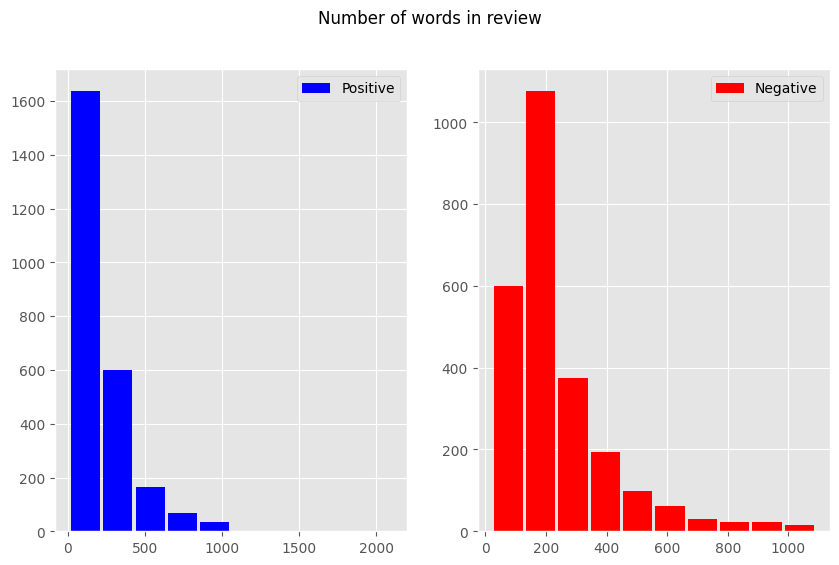

In [15]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].hist(df[df['label'] == 1]['word count'], label='Positive', color='blue', rwidth=0.9);
ax[0].legend(loc='upper right');
ax[1].hist(df[df['label'] == 0]['word count'], label='Negative', color='red', rwidth=0.9);
ax[1].legend(loc='upper right');
fig.suptitle("Number of words in review")
plt.show()

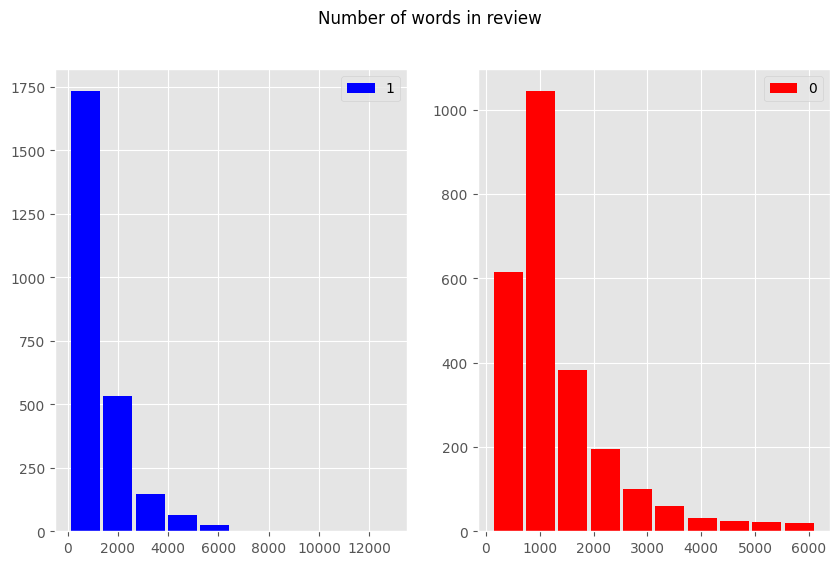

In [19]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].hist(df[df['label'] == 1]['text'].str.len(), label=1, color='blue', rwidth=0.9);
ax[0].legend(loc='upper right');
ax[1].hist(df[df['label'] == 0]['text'].str.len(), label=0, color='red', rwidth=0.9);
ax[1].legend(loc='upper right');
fig.suptitle("Number of words in review")
plt.show()

In [21]:
def data_processing(text):
    text = text.lower()
    text = re.sub('<br />', '', text)
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','', text)
    text = re.sub(r'[^\w\s]','', text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [22]:
df.review = df['text'].apply(data_processing)

<ipython-input-22-7a5d079823eb>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.review = df['text'].apply(data_processing)


In [23]:
duplicated_count = df.duplicated().sum()
print("Number of duplicate entries: ", duplicated_count)

Number of duplicate entries:  5


In [25]:
df = df.drop_duplicates('text')

In [26]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [28]:
df.review = df['text'].apply(lambda x: stemming(x))

<ipython-input-28-92228a9bf19b>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.review = df['text'].apply(lambda x: stemming(x))


In [29]:
df['word count'] = df['text'].apply(no_of_words)
df.head()

<ipython-input-29-fd914fe5b235>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word count'] = df['text'].apply(no_of_words)


,text,label,word count
0,I always wrote this series off as being a comp...,0,381
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0,190
2,This movie was so poorly written and directed ...,0,262
3,The most interesting thing about Miryang (Secr...,1,733
4,"when i first read about ""berlin am meer"" i did...",0,176


In [31]:
pos_reviews = df[df.label ==1]
pos_reviews.head()

,text,label,word count
3,The most interesting thing about Miryang (Secr...,1,733
5,"I saw this film on September 1st, 2005 in Indi...",1,318
7,William Hurt may not be an American matinee id...,1,151
11,I really enjoyed the detail that went into the...,1,131
18,My interest was raised as I was flipping throu...,1,142


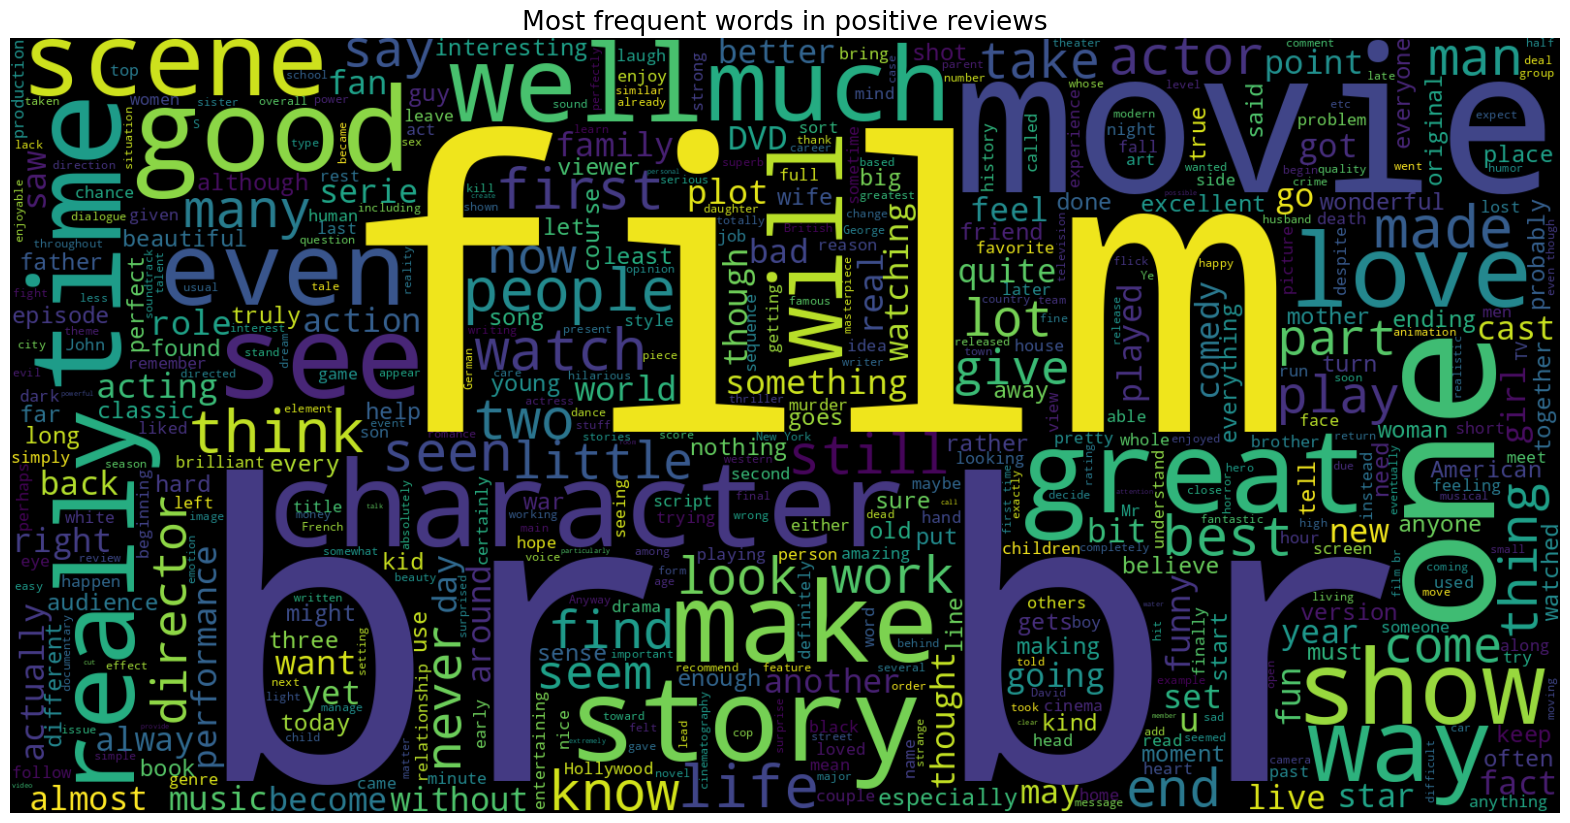

In [36]:
text = ' '.join([word for word in pos_reviews['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive reviews', fontsize = 19)
plt.show()

In [37]:
from collections import Counter
count = Counter()
for text in pos_reviews['text'].values:
    for word in text.split():
        count[word] +=1
count.most_common(15)

[('the', 28767),
 ('and', 16417),
 ('a', 15397),
 ('of', 14694),
 ('to', 12454),
 ('is', 10592),
 ('in', 8928),
 ('I', 6052),
 ('that', 5997),
 ('it', 5096),
 ('this', 5077),
 ('/><br', 4805),
 ('as', 4466),
 ('with', 4354),
 ('was', 4135)]

In [38]:
pos_words = pd.DataFrame(count.most_common(15))
pos_words.columns = ['word', 'count']
pos_words.head()

,word,count
0,the,28767
1,and,16417
2,a,15397
3,of,14694
4,to,12454


In [39]:
px.bar(pos_words, x='count', y='word', title='Common words in positive reviews', color='word')

In [40]:
neg_reviews = df[df.label == 0]
neg_reviews.head()

,text,label,word count
0,I always wrote this series off as being a comp...,0,381
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0,190
2,This movie was so poorly written and directed ...,0,262
4,"when i first read about ""berlin am meer"" i did...",0,176
6,I saw a screening of this movie last night. I ...,0,260


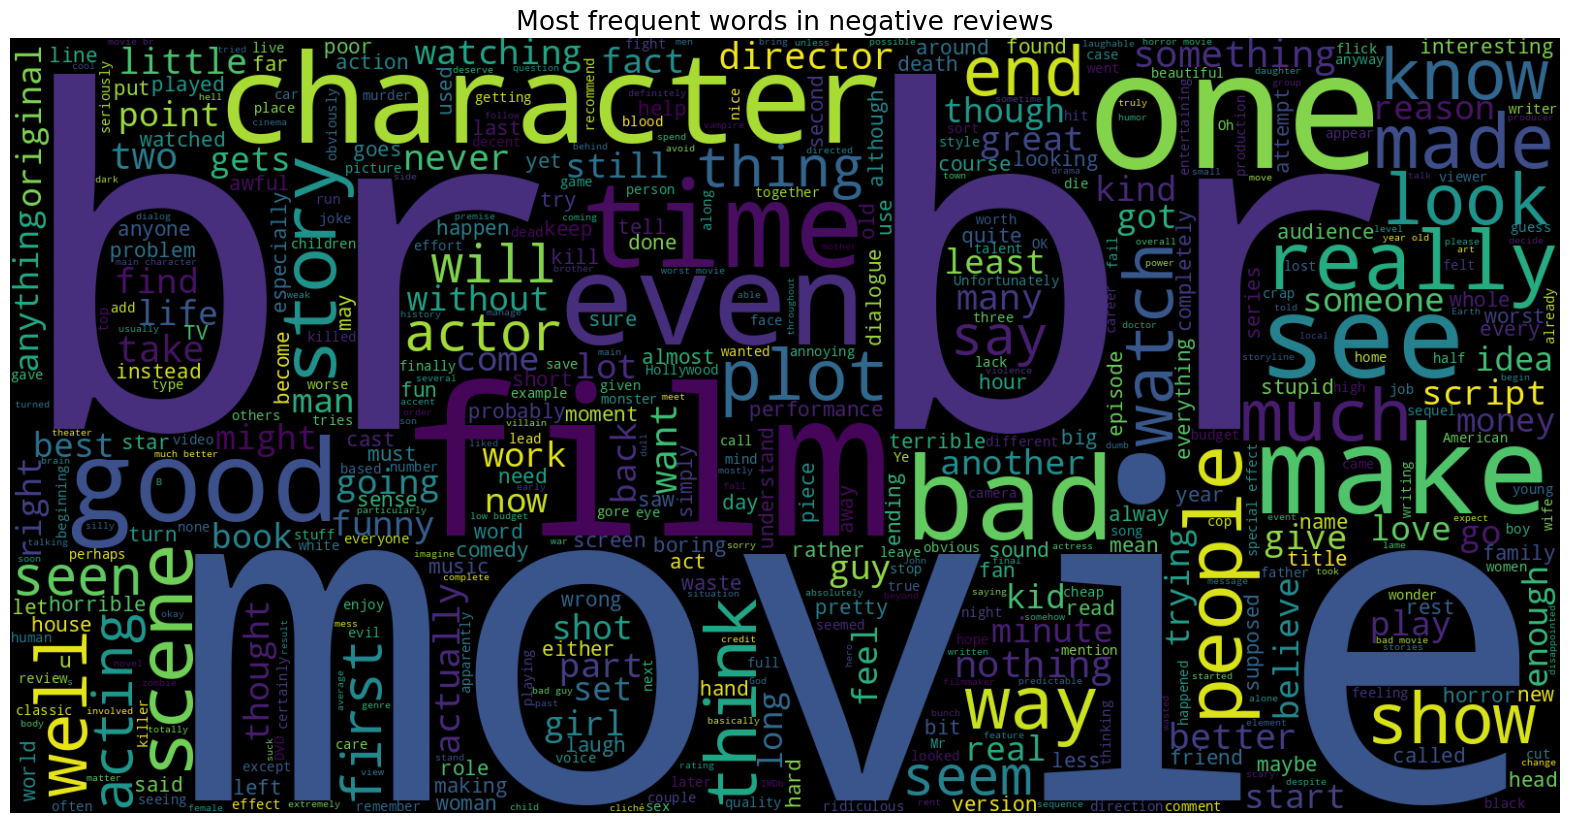

In [41]:
text = ' '.join([word for word in neg_reviews['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative reviews', fontsize = 19)
plt.show()

In [42]:
count = Counter()
for text in neg_reviews['text'].values:
    for word in text.split():
        count[word] += 1
count.most_common(15)

[('the', 28574),
 ('a', 15461),
 ('of', 13790),
 ('to', 13762),
 ('and', 13690),
 ('is', 9673),
 ('in', 8343),
 ('I', 7127),
 ('that', 6627),
 ('this', 6240),
 ('it', 5594),
 ('/><br', 5184),
 ('was', 5144),
 ('for', 4037),
 ('with', 3916)]

In [43]:
neg_words = pd.DataFrame(count.most_common(15))
neg_words.columns = ['word', 'count']
neg_words.head()

,word,count
0,the,28574
1,a,15461
2,of,13790
3,to,13762
4,and,13690


In [44]:
px.bar(neg_words, x='count', y='word', title='Common words in negative reviews', color='word')

In [47]:
X = df['text']
Y = df['label']

In [48]:
vect = TfidfVectorizer()
X = vect.fit_transform(df['text'])

In [49]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [50]:
print("Size of x_train: ", (x_train.shape))
print("Size of y_train: ", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train:  (3496, 39126)
Size of y_train:  (3496,)
Size of x_test:  (1499, 39126)
Size of y_test:  (1499,)


In [51]:
x_train = x_train[:2000]
y_train = y_train[:2000]
x_test = x_test[:500]
y_test = y_test[:500]

In [52]:
print("Size of x_train: ", (x_train.shape))
print("Size of y_train: ", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train:  (2000, 39126)
Size of y_train:  (2000,)
Size of x_test:  (500, 39126)
Size of y_test:  (500,)


In [53]:
x_train = x_train.toarray()
x_test = x_test.toarray()

In [54]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(units=16, activation='relu', input_dim=x_train.shape[1]))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [55]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [56]:
history = model.fit(x_train, y_train, batch_size=10, epochs=15)

Epoch 1/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5382 - loss: 0.6888
Epoch 2/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7272 - loss: 0.6311
Epoch 3/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8623 - loss: 0.4982
Epoch 4/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9553 - loss: 0.3219
Epoch 5/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9769 - loss: 0.1814
Epoch 6/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9794 - loss: 0.1085
Epoch 7/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9894 - loss: 0.0571
Epoch 8/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9947 - loss: 0.0414
Epoch 9/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9977 - loss: 0.0207
Epoch 10/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9984 - loss: 0.0122
Epoch 11/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9992 - loss: 0.0081
Epoch 12/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 

In [57]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │         626,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,252,356 (4.78 MB)

 Trainable params: 626,177 (2.39 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 626,179 (2.39 MB)

In [58]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8190 - loss: 0.4764
Test loss: 0.4414939284324646
Test accuracy: 0.8399999737739563


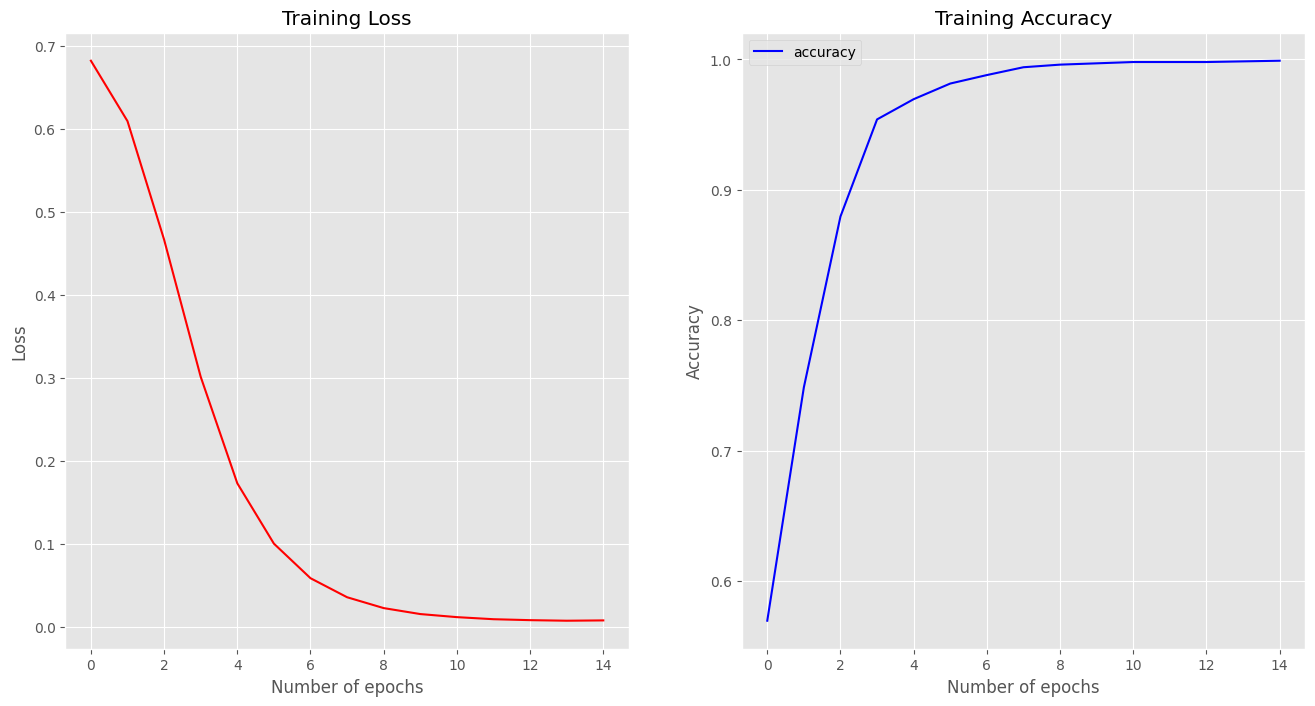

In [59]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], color='r', label='loss')
plt.title('Training Loss')
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], color='b', label='accuracy')
plt.title('Training Accuracy')
plt.xlabel("Number of epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [60]:
model = Sequential()
model.add(Dense(units=16, activation='relu', input_dim=x_train.shape[1]))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [61]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [62]:
history = model.fit(x_train, y_train, batch_size=10, epochs=15)

Epoch 1/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.6169 - loss: 0.6810
Epoch 2/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9528 - loss: 0.3891
Epoch 3/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9930 - loss: 0.0940
Epoch 4/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9995 - loss: 0.0251
Epoch 5/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9983 - loss: 0.0119
Epoch 6/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 1.0000 - loss: 0.0054
Epoch 7/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 1.0000 - loss: 0.0033
Epoch 8/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 1.0000 - loss: 0.0021
Epoch 9/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 1.0000 - loss: 0.0015
Epoch 10/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 1.0000 - loss: 0.0011
Epoch 11/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 1.0000 - loss: 8.4662e-04
Epoch 12/15
200/200 ━━━━━━━━━━━━━━━━━

In [63]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 16)                  │         626,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,878,533 (7.17 MB)

 Trainable params: 626,177 (2.39 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,252,356 (4.78 MB)

In [64]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8266 - loss: 0.4198
Test loss: 0.38314610719680786
Test accuracy: 0.8460000157356262


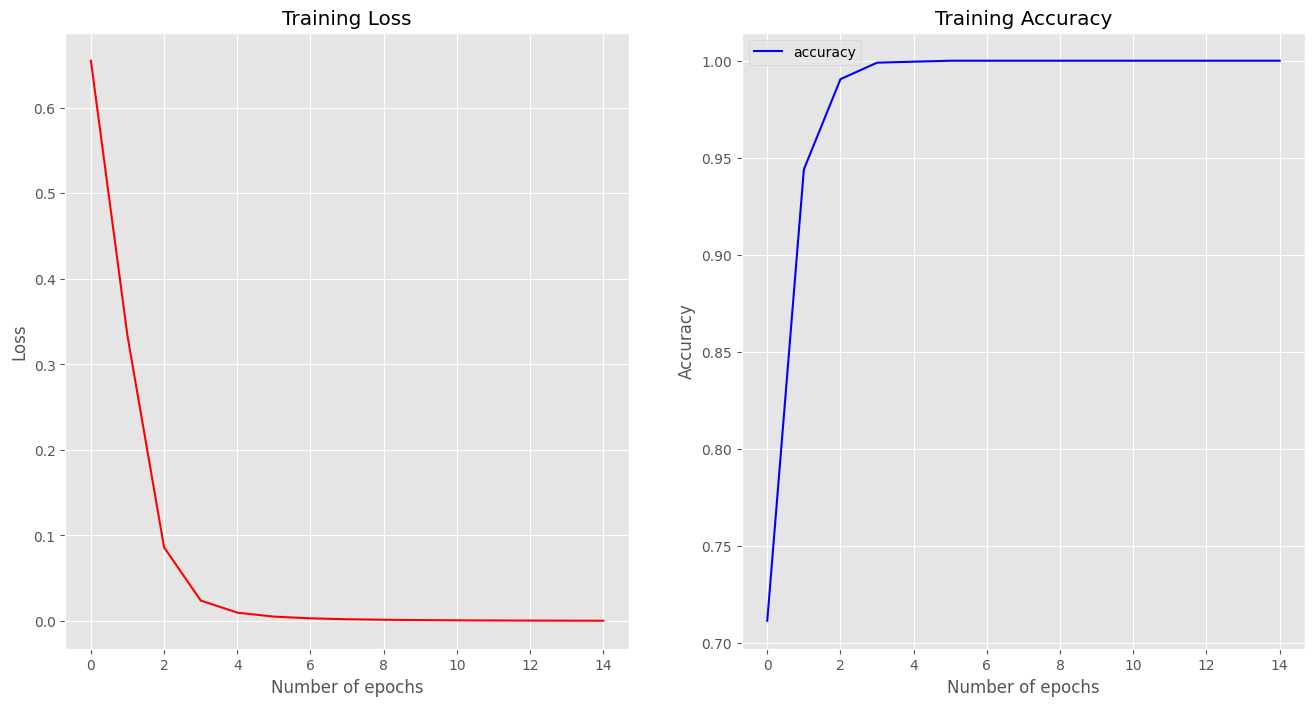

In [65]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], color='r', label='loss')
plt.title('Training Loss')
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], color='b', label='accuracy')
plt.title('Training Accuracy')
plt.xlabel("Number of epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()